In [51]:
# to IO/manipulate/calculate dataframes
import pandas as pd
import numpy as np

# to do math/statisctics
import statistics as stat
import math

# to vitualize data
import matplotlib.pyplot as plt
import seaborn as sns


# to do modeling with sklrean
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

# other packages
import warnings
warnings.filterwarnings(action='ignore')

##  FUNCTION:  Replace the Null elements with the column's mean

In [52]:
def replace_null_with_mean(dataset, feature_list):
    """
    Calculate the mean of each column in a dataset and replace nulls with the column's mean
    """
    [ dataset[feature].fillna(dataset[feature].mean(),inplace=True) for feature in feature_list ]

## FUNCTION: Replace the Null elements with the column's mean

In [53]:
def replace_null_with_mode(dataset, feature_list):
    """
    1. To find the most frequent element in the column with object type
    2. Replace the np.nan with the mode
    """
    [dataset[feature].fillna(stat.mode(dataset[feature]), inplace=True) for feature in feature_list]

In [54]:
def print_dataset(dataset):
    with pd.option_context('display.max_rows', 7, 'display.max_columns', None): 
        display(dataset)    

## FUNCTION: plot_boxplot_category

# FUNCTION: plot_scatter_values

In [55]:
def plot_scatter_values(dataset, category_features=None, remove_zeros=False):
    if category_features==None:
        category_features = [col for col in dataset.columns if dataset[col].dtype==np.float64]
    size_title=26
    size_subtitle=14
    size_label_xy=15
    sns.set(style="white")

    fig, axes = plt.subplots(nrows=int(len(category_features)/3), ncols=3,
                             figsize=(12, int(2*len(category_features))))
    # fig.subplots_adjust(hspace=4)
#     fig.suptitle('Train Dataset\n\n\n', fontsize=size_title,  fontweight='bold')

    for ax, feature in zip(axes.flatten(), dataset[category_features]):
#         if remove_zeros==True:
#             dataset=dataset[dataset[feature]>0]
        sns.scatterplot(ax=ax, y=dataset[feature], x=dataset['SalePrice']/1000)
#         sns.kdeplot(ax=ax, y=dataset[feature], x=dataset['sale_price']/1000,
#                     n_levels=3, cmap='PiYG', thresh=0.5)
        
        ax.tick_params(axis='both', labelsize=size_label_xy)
        ax.set_title(feature.upper().replace('_',' '), fontsize=18,  fontweight='bold')
        ax.set_ylabel(' ',fontsize=size_label_xy)
        ax.set_xlabel('Sale Price k[$]',fontsize=size_label_xy)
        ax.set(xlim=(0, 600), ylim=None)
        ax.grid(b=True, which='major', axis='both')

    plt.rcParams['xtick.labelsize'] = 15
    plt.rcParams['ytick.labelsize'] = 15
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12

    plt.tight_layout();
    # plt.savefig('seaborn-style.svg', bbox_inches='tight')

In [56]:
def plot_boxplot_category(dataset, category_features=None):
    if category_features==None:
        category_features = [col for col in dataset.columns if dataset[col].dtype==np.object_]
    size_title=26
    size_subtitle=14
    size_label_xy=15
    sns.set(style="white")

    fig, axes = plt.subplots(nrows=int(1+len(category_features)/3), ncols=3,
                             figsize=(12, int(1.5*len(category_features))))
    # fig.subplots_adjust(hspace=4)
#     fig.suptitle('Train Dataset\n\n\n', fontsize=size_title,  fontweight='bold')

    for ax, feature in zip(axes.flatten(), dataset[category_features]):
        my_order = dataset.groupby(by=[feature])['SalePrice'].mean().sort_values().index
        sns.boxplot(ax=ax, y=dataset[feature], x=dataset['SalePrice']/1000, order=list(my_order[::-1]))
        ax.tick_params(axis='both', labelsize=size_label_xy)
        ax.set_title(feature.upper().replace('_',' '), fontsize=18,  fontweight='bold')
        ax.set_ylabel(' ',fontsize=size_label_xy)
        ax.set_xlabel('Sale Price k[$]',fontsize=size_label_xy)
        ax.set(xlim=(0, 600), ylim=None)
        ax.grid(b=True, which='major', axis='both')

    plt.rcParams['xtick.labelsize'] = 15
    plt.rcParams['ytick.labelsize'] = 15
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12

    plt.tight_layout();
    # plt.savefig('seaborn-style.svg', bbox_inches='tight')

In [57]:
def check_nulls(dataset):
    """
    This function read the dataset and report the following:
    1. column names with null
    2. null count 
    3. null count % 
    4. the first 10 element of each
    """
    xlist=[]
    for col in dataset.columns:
        number_of_nulls = dataset[col].isnull().sum()
#         print(col,number_of_nulls)
        if number_of_nulls!=0:
            xlist.append((col,number_of_nulls,
                          round(number_of_nulls*100/len(dataset),1) ,dataset[col][0:10].values))
    null_data = pd.DataFrame(data=xlist,columns=['column name','null count',
                                            'null count %','values example'])
    return null_data

# Read Train and Test dataset ===========================================================

In [67]:
test = pd.read_csv('../datasets/test_df_cleaned.csv', index_col = 0)

In [68]:
# print_dataset(test)

In [69]:
train = pd.read_csv('../datasets/train_df_cleaned.csv', index_col = 0)
train = train[(train['SalePrice'] > 77000) & (train['SalePrice'] < 400000)]

In [70]:
# print_dataset(train)

# Build Model ============================================================

In [71]:
# (list(test.columns))

In [72]:
    
features = [
 'Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'Gr Liv Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
    'Garage Cars',
    
    'Foundation',
    'Exter Qual' , 
    'Bsmt Qual', 
    'Bsmt Cond',    
    'Bsmt Exposure',
    'BsmtFin Type 1', 
    'Heating QC',  
    'Kitchen Qual',
    'Garage Finish',  
    'Paved Drive',  
    'Fence',   
    
 'Overall Qual_3',
 'Overall Qual_4',
 'Overall Qual_5',
 'Overall Qual_6',
 'Overall Qual_7',
 'Overall Qual_9',
 'Overall Qual_10',
    
 'Overall Cond_3',
 'Overall Cond_4',
 'Overall Cond_5',
 'Overall Cond_6',
 'Overall Cond_7',
 'Overall Cond_8',
    
'MS SubClass_30',
 'MS SubClass_40',
 'MS SubClass_45',
 'MS SubClass_50',
 'MS SubClass_60',
 'MS SubClass_70',
 'MS SubClass_75',
 'MS SubClass_80',
 'MS SubClass_85',
 'MS SubClass_90',
 'MS SubClass_120',
 'MS SubClass_160',
 'MS SubClass_180',
 'MS SubClass_190',

'Age',
'remodel age',
'Garage Age',
'Garage Type_Detchd',
'Mas Vnr Type_None', 
    
'MS Zoning_FV',
 'MS Zoning_RH',
 'MS Zoning_RL',
 'MS Zoning_RM',  
    
'House Style_1.5Unf',
 'House Style_1Story',
 'House Style_2Story',
 'House Style_SFoyer',
 'House Style_SLvl', 

'Neighborhood_Edwards',    
'Neighborhood_IDOTRR'  ,   
'Neighborhood_NAmes' ,     
'Neighborhood_NoRidge' ,   
'Neighborhood_NridgHt'  ,  
'Neighborhood_OldTown' ,   
'Neighborhood_Sawyer'   ,  
'Neighborhood_Somerst'  ,  
'Neighborhood_StoneBr'   , 
    
]



In [73]:
df_train = train
df_test = test

X = df_train[features]
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

y_train = np.log(y_train)
y_test  = np.log(y_test)

scale = StandardScaler()
Xs_train = scale.fit_transform(X_train)
Xs_test = scale.transform(X_test)

r_alpha = np.logspace(0,3,100)
# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = r_alpha, scoring = 'r2', cv=5)
#model
model = ridge_cv.fit(Xs_train, y_train)
# Instantiate.
ridge_model = Ridge(alpha=model.alpha_) 
model.score(Xs_train, y_train), model.score(Xs_test, y_test)

(0.920461197713186, 0.9026773189247089)

In [74]:
cross_val_score(model, Xs_train, y_train, cv=5)


array([0.91034694, 0.88088296, 0.90014195, 0.91479149, 0.92268643])

In [86]:
metrics.mean_squared_error(np.e**y_train , np.e**model.predict(Xs_train), squared=False)

16754.924992543303

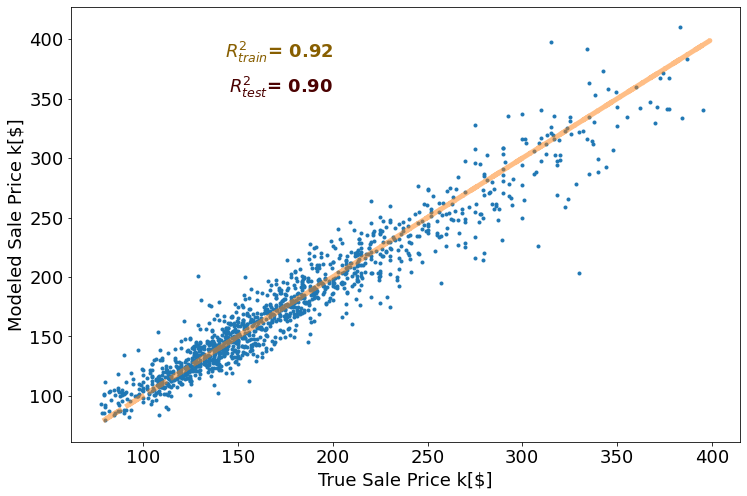

In [76]:
plt.figure(figsize=(12,8))
plt.plot((np.e**y_train)/1000 , (np.e**model.predict(Xs_train))/1000,'.')
plt.plot(y/1000 , y/1000 , '--' , alpha=0.5, lw=5)
plt.xlabel('True Sale Price k[$]',fontsize=18)
plt.ylabel('Modeled Sale Price k[$]',fontsize=18)

plt.text(x=200, y=400, s="$R^2_{train}$= %2.2f" % model.score(Xs_train, y_train),\
        fontweight='demibold', fontsize=18, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.text(x=200, y=370, s="$R^2_{test}$= %2.2f" % model.score(Xs_test , y_test),\
        fontweight='demibold', fontsize=18, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

In [77]:
# scale = StandardScaler()
Zs_test = scale.transform(df_test[features])

In [78]:
kaggle_preds = np.e**( model.predict(Zs_test))

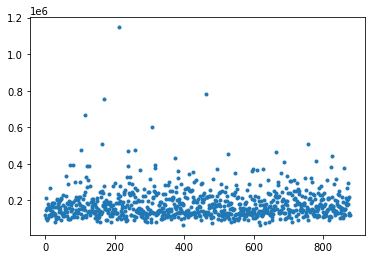

In [79]:
plt.plot(kaggle_preds, '.');

In [80]:
kaggle_output = {'Id' : df_test['Id'], 'SalePrice':kaggle_preds}

In [81]:
# kaggle_output

In [82]:
dataframe = pd.DataFrame(kaggle_output)

In [83]:
dataframe.head()

,Id,SalePrice
0,2658,120737.571357
1,2718,145816.297704
2,2414,211871.624403
3,1989,106548.351377
4,625,158697.324670


In [84]:
dataframe.to_csv('demo_submission.csv', index=False)